# K Nearest Neighbour

#### About knn algorithm
KNN is one of machine learning algorithm used to make prediction based on past available data. KNN categorise things based on their 'characterstic', it is based on feature similarity. 

KNN is one of the simplest supervised Machine Learning algorithm mostly used for. We can classify data points based on how its neighbour are classified. K in KNN algorithm is the parameter that refer to the number of nearest neighbour to be included in the majority of voting process. For example, when k = 5,  a data points is classified by majority votes from its 5 nearest neighbours. 

How do we choose the factor k? Choosing the right value of k is a process called parameter tuning, and is important for better accuracy. Depending on the k value, our model prediction will differ greatly. Low value of k will cause our prediction to be biased to the noice in the data. While high value of k will take too long to process. The rule of thumb to take the value of k is to take the square root of sample size, which is the total number of data points. We should take odd value of k, to avoid confusion between two classes of data. 

When to choose KNN algorithm? KNN is used when the data is labelled and the data is noice free. It is also good to use KNN when dataset is small because KNN doesn't discriminate functon from training set. 

Usually, euclidian distance is taken to take the distance between one particular data points to its nearest neighbours.


#### Visulization of KNN algorithm

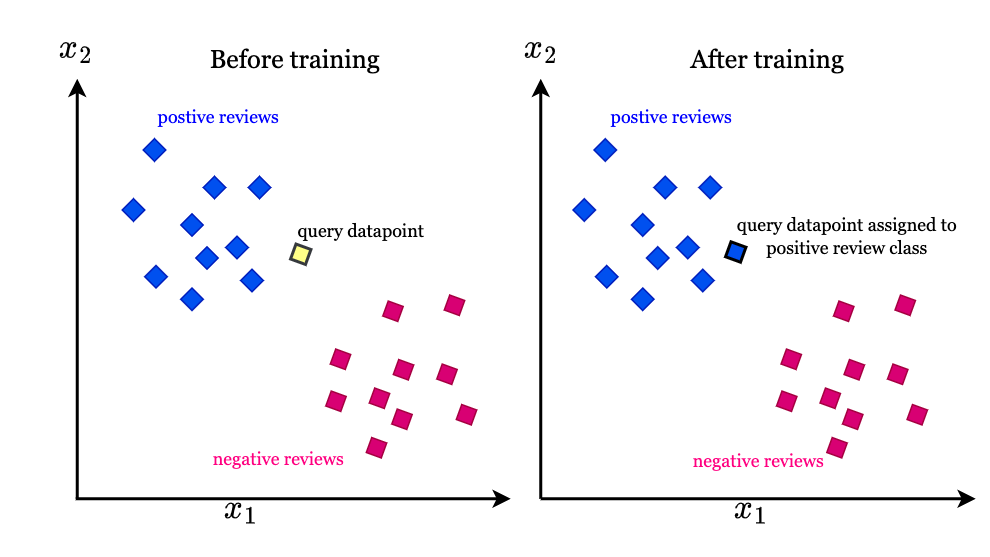

## K Nearest Neighbour [Project 2: Iris Flower Species Prediction]

#### Problem Statement
Iris flower species prediction (Iris flower Dataset)

Problem Statement\
As a data analyst working with environmental group, we are required to analyze some samples of iris flowers to make prediction about random iris flower given its features. Refer below to the images of each iris flower species.

#### Algorithm
Predict the species of a random iris flower given its features using knn algorithm in python

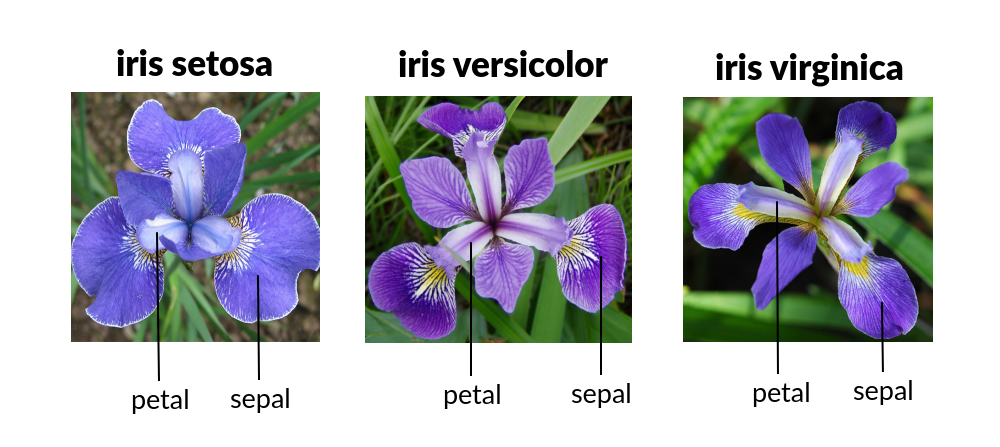

#### Import packages

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

%matplotlib inline
np.random.seed(42)

#### Load iris dataset

In [15]:
# load dataset and add feature names
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# the names of feature columns
print(iris.feature_names)

# the name of the target prediction
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [17]:
# the target value in numbers
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
# load target column to the data table
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Descriptive statistics

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Visualization of the value of the dataset outcome 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


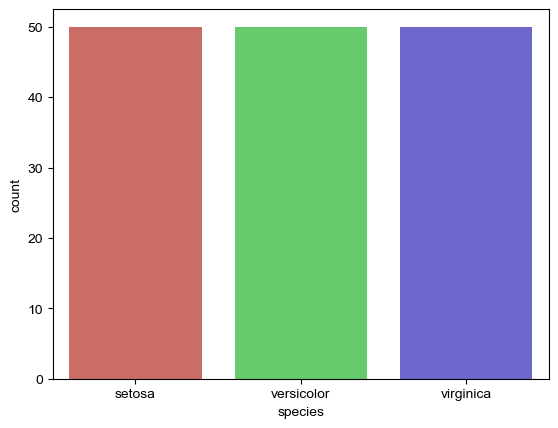

In [21]:
print(df['species'].value_counts())

plt.rcParams.update(plt.rcParamsDefault)
sns.countplot(x='species',data = df, palette='hls',order = df['species'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

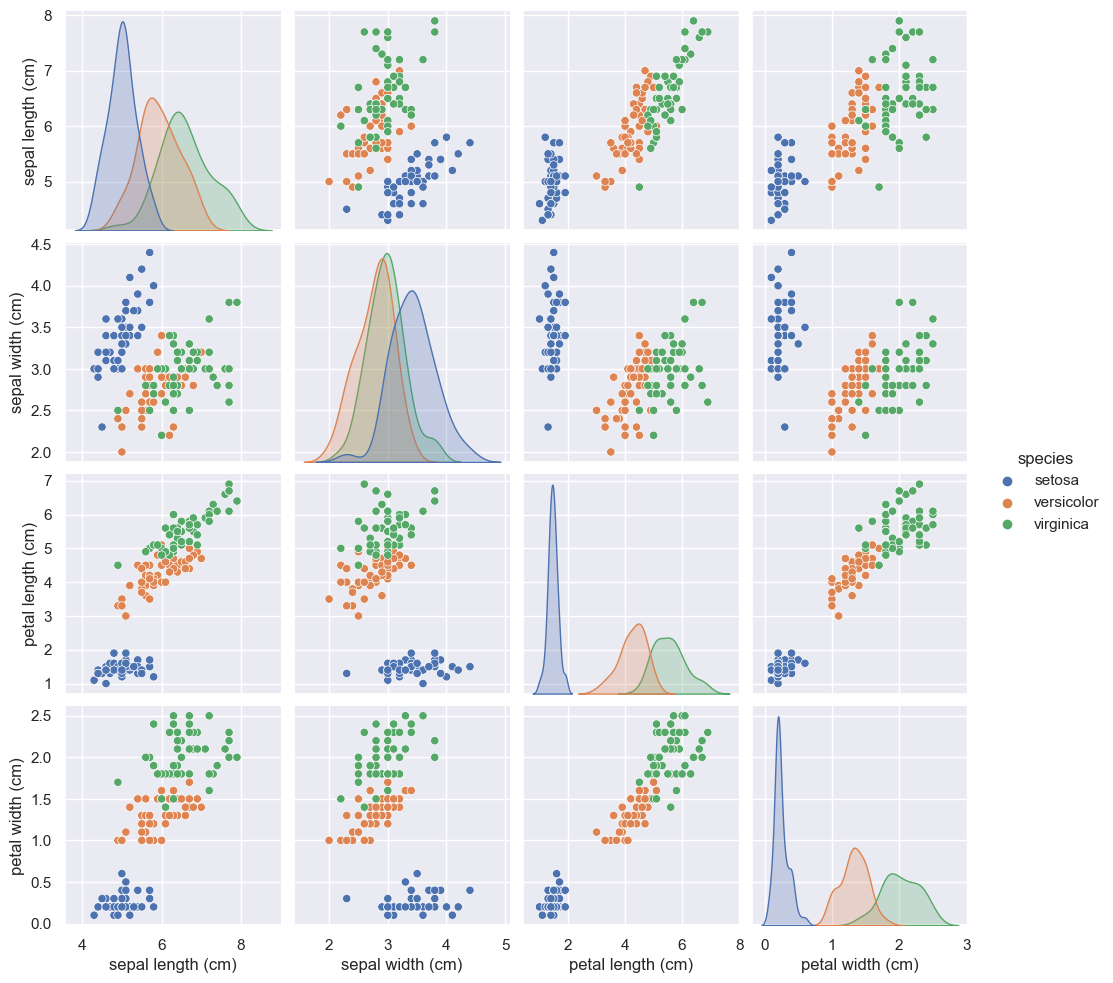

In [27]:
# seaborn pairplot based on flower species
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.

sns.pairplot(df, hue = 'species')

#### KNN algorithm

In [28]:
# split the dataset into independent and dependent variable
# use sklearn.model selection train_test_split

x = df.iloc[:,0:4]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [29]:
# set K value
import math
math.sqrt(len(y_test))

6.164414002968976

#### Standard scaler

Standard Scaler is used to preprocess and rescale the data. This will change data value by scaling the data using (x - u / stddev). We need to keep the data standardize. We don't need to scale the dependent variable


In general, standardization of the data is common for many machine learning estimator. The reason behind this is the data might behave badly if the individual feature do not look more or less like the Gaussian Distribution. We do not want to have bias because of the outlier in the data.

As a rule of thumb, any algorithm that compute distances or assumes normality, have to be scaled before computation.

In [30]:
# feature scaling using StandardScaler()
# scale the data using x - u / stddev
# keep the data standardize. We dont need to scale the dependent variable


scaling_x = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)

In [33]:
# define the model using KNeighborsClassifier and fit the train data in the model
# Define the model: Init k_NN
# n_neighbors is k value, 
# p is 2 because our model is for binary prediction(diabetic or not) 
# our metric is euclidean (k=5)
classifier = KNeighborsClassifier(n_neighbors = 5 , p = 2, metric = 'euclidean')

# Fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [34]:
# Predict using test set data
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

#### Model evaluation

In [35]:
# Evaluate the model: confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [38]:
# Evaluate the model: accuracy_model
# how many we get right vs how many we get wrong
accuracy_score(y_test,y_pred)

0.9736842105263158

In [41]:
target = iris.target_names.tolist()
target

['setosa', 'versicolor', 'virginica']

Text(0.5, 1.0, 'Accuracy Score: 0.9736842105263158')

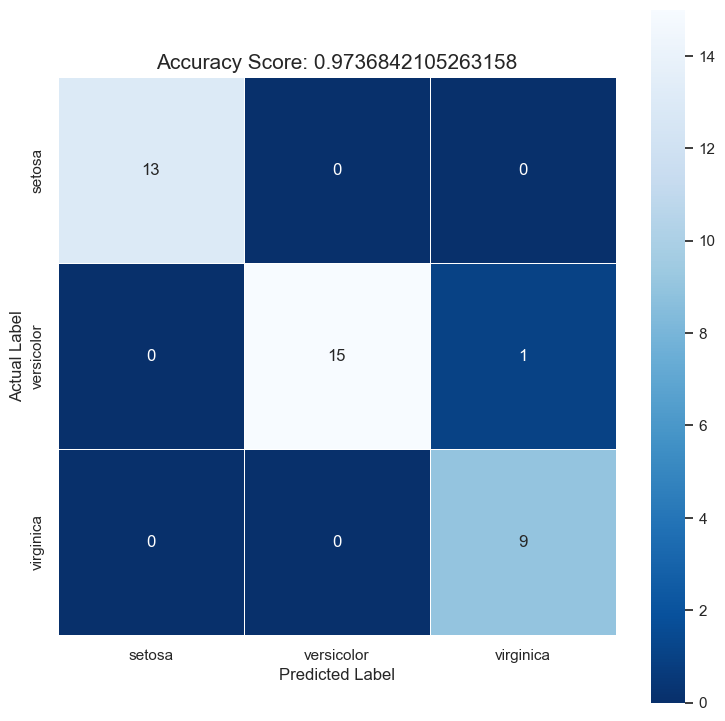

In [43]:
# make confusion matrix using seaborn heatmap

plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r",xticklabels = target, yticklabels = target) 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15)